<a href="https://colab.research.google.com/github/Priyanka3008/StockPricePrediction/blob/main/LSTM_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import yfinance as yf
data=yf.download('AAPL',start='2008-01-01',end='2024-08-01')
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close      Volume
Date                                                                     
2008-01-02  7.116786  7.152143  6.876786  6.958571   5.876341  1079178800
2008-01-03  6.978929  7.049643  6.881786  6.961786   5.879056   842066400
2008-01-04  6.837500  6.892857  6.388929  6.430357   5.430277  1455832000
2008-01-07  6.473214  6.557143  6.079643  6.344286   5.357592  2072193200
2008-01-08  6.433571  6.516429  6.100000  6.116071   5.164870  1523816000


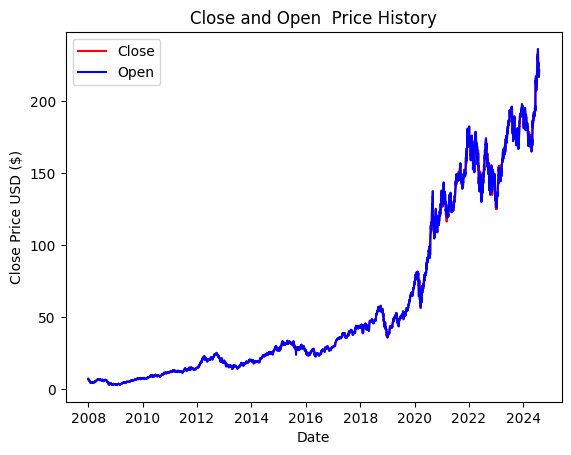

In [ ]:
plt.plot(data['Close'],label ='Close',color='red')
plt.plot(data['Open'],label ='Open',color='blue')
plt.legend()
plt.title('Close and Open  Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
data[data.columns]=MMS.fit_transform(data)

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,0.018325,0.018026,0.017733,0.017954,0.015151,0.315066
2008-01-03,0.017735,0.017589,0.017755,0.017967,0.015162,0.244263
2008-01-04,0.017129,0.016920,0.015615,0.015677,0.013230,0.427536
2008-01-07,0.015570,0.015487,0.014272,0.015306,0.012917,0.611583
2008-01-08,0.015400,0.015313,0.014360,0.014323,0.012087,0.447836


In [ ]:
print(data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 15
X, y = create_sequences(data['Close'].values, seq_length)

In [ ]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(12))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X, y, epochs=50, batch_size=32)

Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0364
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3691e-04
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.2521e-04
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0762e-04
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.2566e-04
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0747e-04
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.2087e-04
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.9647e-05
Epoch 9/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0464e-04
Epoch 10/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1.0685e-04
Epoch 11/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.1061e-04
Epoch 12/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0666e-04
Epoch 13/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1610e-04
Epoch 14/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.9822e-05
Ep

In [ ]:
X_test, y_test = create_sequences(test_data['Close'].values, seq_length)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
predictions = model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [ ]:
predictions

array([[0.3812224 ],
       [0.3837861 ],
       [0.38475206],
       ...,
       [0.93277246],
       [0.9335644 ],
       [0.9361206 ]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('RMSE:', rmse)


RMSE: 0.01384575241387316


In [ ]:
last_sequence = data['Close'].values[-seq_length:].reshape(1, seq_length, 1)

In [ ]:
future_predictions = []
for _ in range(6):  # Predict for 6 months
    next_pred = model.predict(last_sequence)
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
print(future_predictions)

[0.94749177, 0.95370907, 0.9602474, 0.9671202, 0.97435015, 0.9818666]
